# SciKit-learn regressor testing results

## Notebook set-up

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

## 1. Data loading

In [2]:
data_file='../data/processed/01.2-binary_target_encoded_data_df.pkl'

with open(data_file, 'rb') as input_file:
    data_dict=pickle.load(input_file)

data_file='../data/results/data/sklearn_regressor_test.pkl'

with open(data_file, 'rb') as input_file:
    results=pickle.load(input_file)

print(f'Models: {list(results.keys())}')

Models: ['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Polynomial SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'SGD', 'XGBoost', 'CatBoost']


## 2. Baseline performance

In [3]:
efs_time_mean=np.mean(np.log(data_dict['Testing labels']['efs_time']))
dumb_guess=root_mean_squared_error([efs_time_mean]*len(data_dict['Testing labels']), data_dict['Testing labels']['efs_time'])
print(f'Baseline model rmse: {dumb_guess:.1f}')

Baseline model rmse: 31.9


## 3. Cross-validation performance

In [4]:
results_dfs=[]

for model, data in results.items():
    print(f"{model}: {data['Best hyperparameters']}")

    results_dfs.append(pd.DataFrame.from_dict({'Model': [model]*len(data['Cross validation scores']), 'Cross-validation scores': abs(data['Cross validation scores'])}))

results_df=pd.concat(results_dfs, axis=0)
results_df.head()

Nearest Neighbors: {'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Linear SVM: {'C': 0.5, 'epsilon': 2, 'max_iter': 10000}
RBF SVM: {'C': 0.25, 'epsilon': 1, 'gamma': 'auto', 'max_iter': 10000}
Polynomial SVM: {'C': 0.5, 'coef0': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'max_iter': 10000}
Decision Tree: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 0.8, 'splitter': 'best'}
Random Forest: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 7, 'max_features': 0.5, 'n_estimators': 20}
Neural Net: {'alpha': 5e-05, 'hidden_layer_sizes': 8, 'learning_rate': 'invscaling'}
AdaBoost: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 50}
SGD: {'alpha': 0.0002, 'l1_ratio': 0.3, 'learning_rate': 'adaptive', 'loss': 'squared_error'}
XGBoost: {'max_depth': 5, 'n_estimators': 50, 'subsample': 1}
CatBoost: {'depth': 5, 'model_size_reg': 0.001, 'n_estimators': 200}


,Model,Cross-validation scores
0,Nearest Neighbors,1.024443
1,Nearest Neighbors,1.031975
2,Nearest Neighbors,1.024246
3,Nearest Neighbors,1.022842
0,Linear SVM,1.034814


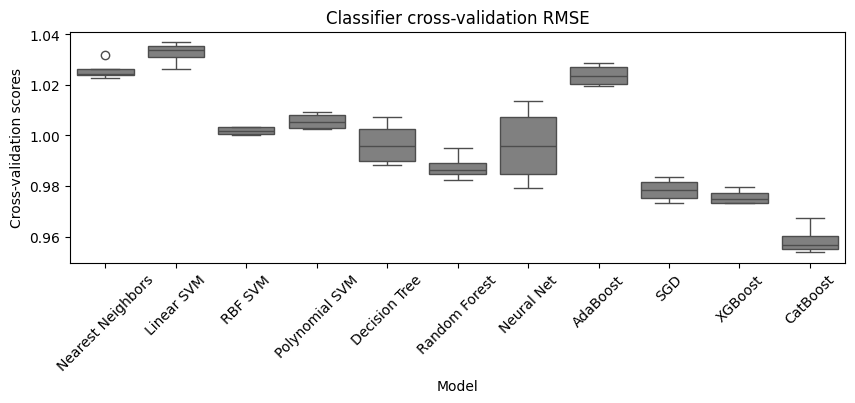

In [5]:
fig, ax=plt.subplots(1,1, figsize=(10,3))

ax.set_title('Classifier cross-validation RMSE')
sns.boxplot(results_df, x='Model', y='Cross-validation scores', ax=ax, color='grey')
ax.tick_params(axis='x', labelrotation=45)
fig.show()

## 4. Prediction plots

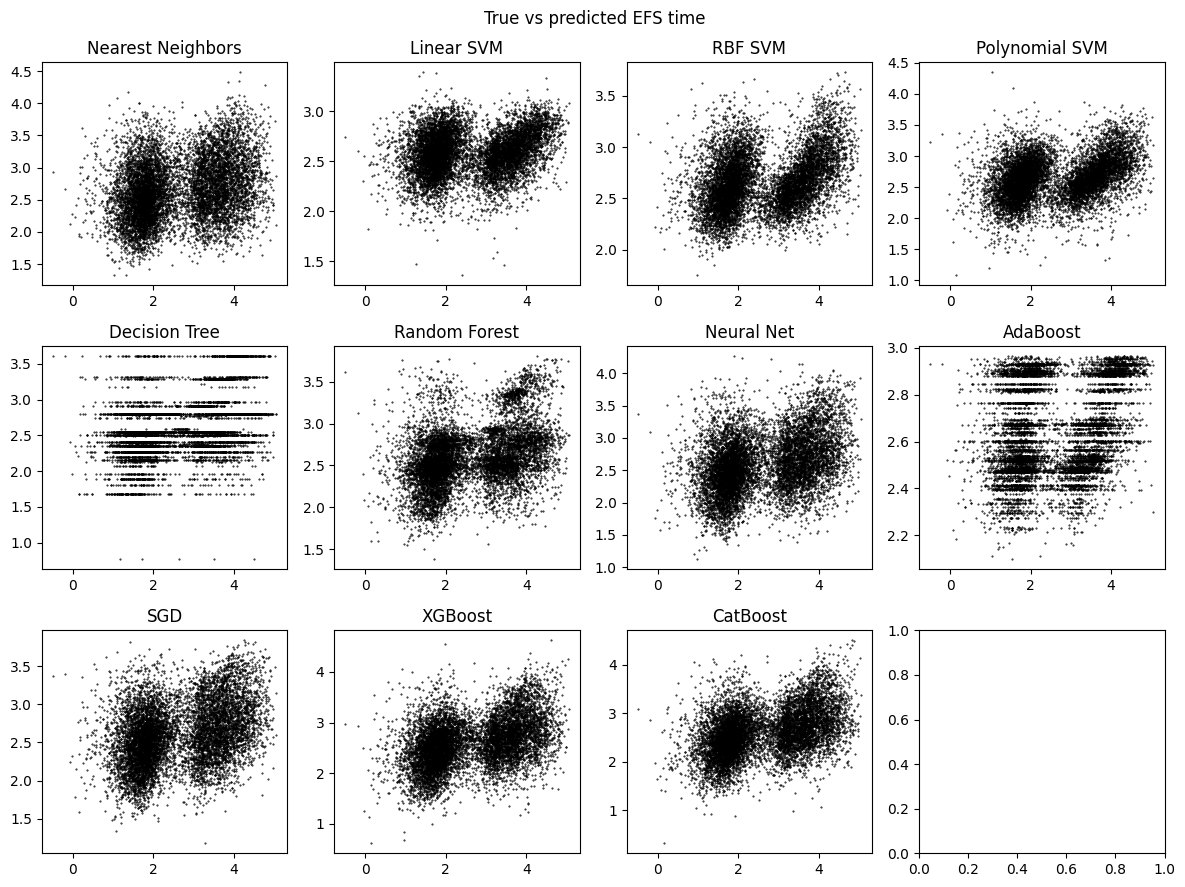

In [6]:
rows=len(results.keys()) // 4

if len(results.keys()) % 4 == 0:
    rows=len(results.keys()) // 4

elif len(results.keys()) % 4 > 0:
    rows=(len(results.keys()) // 4) + 1

if rows == 0:
    rows=1

fig, axs=plt.subplots(rows,4, figsize=(12,3*rows))
axs=axs.flatten()

fig.suptitle('True vs predicted EFS time')

for i, (model, data) in enumerate(results.items()):
    axs[i].set_title(model)
    axs[i].scatter(np.log(data_dict['Testing labels']['efs_time']), data['Testing predictions'], s=0.2, color='black')

fig.tight_layout()
fig.show()

## 4. Fit residuals

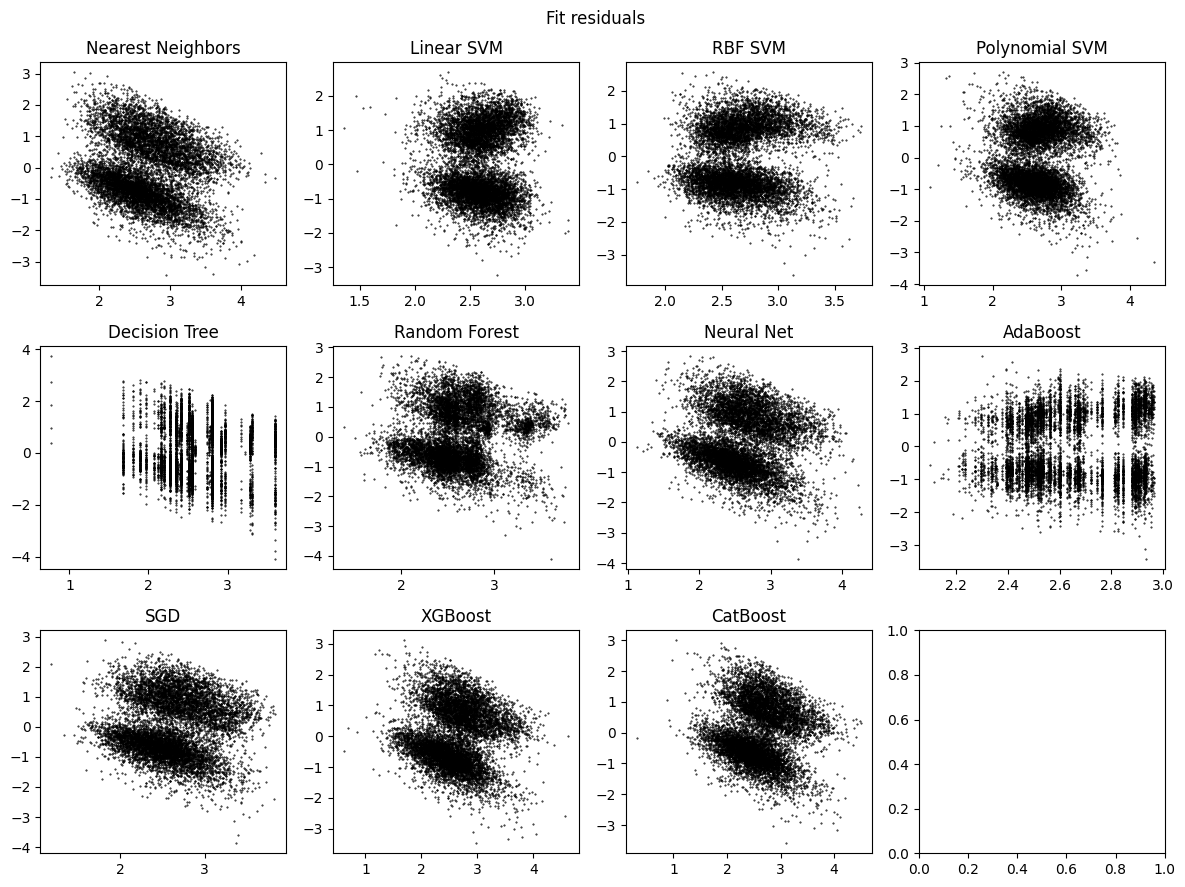

In [7]:
rows=len(results.keys()) // 4

if len(results.keys()) % 4 == 0:
    rows=len(results.keys()) // 4

elif len(results.keys()) % 4 > 0:
    rows=(len(results.keys()) // 4) + 1

if rows == 0:
    rows=1

fig, axs=plt.subplots(rows,4, figsize=(12,3*rows))
axs=axs.flatten()

fig.suptitle('Fit residuals')

for i, (model, data) in enumerate(results.items()):
    residuals=np.log(data_dict['Testing labels']['efs_time'])-data['Testing predictions']
    axs[i].set_title(model)
    axs[i].scatter(data['Testing predictions'], residuals, s=0.2, color='black')

fig.tight_layout()
fig.show()